In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import torch
import joblib
from sklearn import preprocessing
%matplotlib inline
from sklearn import ensemble
from utils import loadData
from sklearn.neural_network import MLPRegressor
from utils import loadData, saveData, saveans
from tqdm import tqdm
import graphviz
import lightgbm as lgb
import pywt

In [2]:
testpath = "data/final.h5"
trainpath = "data/final-2.h5"
geopath = "data/geo.h5"

In [3]:
trainPET, trainWF, trainPT = loadData(trainpath, 'PT')

Structure of data:
<HDF5 dataset "PETruth": shape (9137011,), type "|V20"> PETruth /PETruth
<HDF5 dataset "ParticleTruth": shape (2000,), type "|V40"> ParticleTruth /ParticleTruth
<HDF5 dataset "Waveform": shape (6041164,), type "|V2008"> Waveform /Waveform


463837


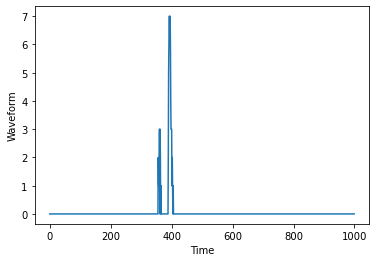

In [39]:
index = np.random.randint(0, trainWF.shape[0]-1)
print(index)
try_waveform = trainWF['Waveform'][index]
noise_floor = 918

# plt.plot(range(0, 1000), trainWF[1][2])
# plt.plot(range(0, 1000), trainWF[2][2])
# plt.plot(range(0, 1000), trainWF[3][2])
# plt.plot(range(0, 1000), trainWF[500][2])
plt.plot(np.where(try_waveform > noise_floor, 0, noise_floor-try_waveform))
plt.ylabel("Waveform")
plt.xlabel("Time")
plt.show()

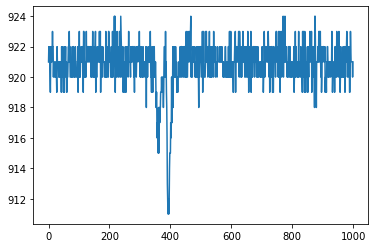

In [41]:
plt.plot(try_waveform)
plt.show()

In [42]:
e_tru, i_tru = np.unique(trainPET['EventID'], return_index=True)
i_tru = np.append(i_tru, len(trainPET))
w_tru, j_tru = np.unique(trainWF['EventID'], return_index=True)
j_tru = np.append(j_tru, len(trainWF))
numPET = np.diff(i_tru)
numPEW = np.diff(j_tru)
invTrainWF = 1000-trainWF['Waveform']

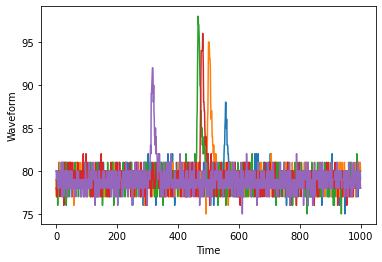

In [43]:
plt.plot(range(0, 1000), invTrainWF[0])
plt.plot(range(0, 1000), invTrainWF[1])
plt.plot(range(0, 1000), invTrainWF[2])
plt.plot(range(0, 1000), invTrainWF[3])
plt.plot(range(0, 1000), invTrainWF[99999])
plt.ylabel("Waveform")
plt.xlabel("Time")
plt.show()

In [7]:
# 小波滤噪
def wavelet_denoising(data):
    # 小波函数取db4
    db4 = pywt.Wavelet('db4')
    # 分解
    coeffs = pywt.wavedec(data, db4)
    # 高频系数置零
    coeffs[len(coeffs)-1] *= 0
    coeffs[len(coeffs)-2] *= 0
    coeffs[len(coeffs)-3] *= 0
    # 重构
    meta = pywt.waverec(coeffs, db4)
    return meta

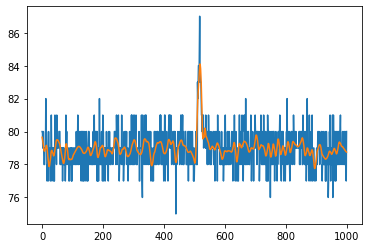

In [8]:
plt.plot(range(1000), invTrainWF[10])
plt.plot(range(1000), wavelet_denoising(invTrainWF[10:12])[0])
plt.show()

In [11]:
deninv = wavelet_denoising(invTrainWF)

In [10]:
invTrainWF[10:12]

array([[80, 80, 79, ..., 78, 77, 80],
       [79, 80, 79, ..., 77, 80, 81]], dtype=int16)